In [1]:
import torch
import torch.nn.functional as F

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = ['.'] + sorted(set(''.join(words)))
stoi = {s:i for i, s in enumerate(chars)}
itos = chars
print(chars)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [5]:
from collections import deque

In [6]:
block_size = 3
X, Y = [], []

for w in words:
    # print(w)
    context = deque([0] * block_size)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(list(context))
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context.popleft()
        context.append(ix)
X = torch.tensor(X)
Y = torch.tensor(Y)

In [198]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        # print(w)
        context = deque([0] * block_size)
        for ch in w + '.':
            ix = stoi[ch]
            X.append(list(context))
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context.popleft()
            context.append(ix)
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

g = torch.Generator().manual_seed(2147483647)
train_words, dev_words, test_words = torch.utils.data.random_split(words, [0.8, 0.1, 0.1], generator=g)

In [200]:
len(train_words), len(dev_words), len(test_words)

(25627, 3203, 3203)

In [201]:
Xtr, Ytr = build_dataset(train_words)
Xdev, Ydev = build_dataset(dev_words)
Xtest, Ytest = build_dataset(test_words)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [63]:
C = torch.randn((27, 2))

In [64]:
C

tensor([[-0.0911, -0.0531],
        [ 0.5630,  1.5152],
        [-0.0350, -1.6401],
        [ 0.8510,  1.6695],
        [-0.2371, -0.1117],
        [-0.7774, -0.8118],
        [-0.7479,  1.1421],
        [ 0.1516,  1.9678],
        [ 0.9293, -0.3404],
        [ 0.3232,  0.9799],
        [-0.3353,  0.0318],
        [ 2.3204, -1.3726],
        [-0.4823,  1.4359],
        [-1.4491,  0.8704],
        [ 1.1807, -0.3209],
        [-1.2031,  0.8097],
        [-1.2339,  1.0359],
        [-1.5705,  0.7998],
        [ 0.9976,  0.1456],
        [-1.1554, -0.6296],
        [-1.0450, -1.4984],
        [-0.4296,  1.3775],
        [-2.0475,  0.1181],
        [ 0.0901,  1.2574],
        [ 1.3963,  1.4034],
        [-0.2289, -0.0664],
        [ 0.7818,  1.0161]])

In [65]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [66]:
emb[0]

tensor([[-0.0911, -0.0531],
        [-0.0911, -0.0531],
        [-0.0911, -0.0531]])

In [67]:
emb

tensor([[[-0.0911, -0.0531],
         [-0.0911, -0.0531],
         [-0.0911, -0.0531]],

        [[-0.0911, -0.0531],
         [-0.0911, -0.0531],
         [-0.7774, -0.8118]],

        [[-0.0911, -0.0531],
         [-0.7774, -0.8118],
         [-1.4491,  0.8704]],

        [[-0.7774, -0.8118],
         [-1.4491,  0.8704],
         [-1.4491,  0.8704]],

        [[-1.4491,  0.8704],
         [-1.4491,  0.8704],
         [ 0.5630,  1.5152]],

        [[-0.0911, -0.0531],
         [-0.0911, -0.0531],
         [-0.0911, -0.0531]],

        [[-0.0911, -0.0531],
         [-0.0911, -0.0531],
         [-1.2031,  0.8097]],

        [[-0.0911, -0.0531],
         [-1.2031,  0.8097],
         [-0.4823,  1.4359]],

        [[-1.2031,  0.8097],
         [-0.4823,  1.4359],
         [ 0.3232,  0.9799]],

        [[-0.4823,  1.4359],
         [ 0.3232,  0.9799],
         [-2.0475,  0.1181]],

        [[ 0.3232,  0.9799],
         [-2.0475,  0.1181],
         [ 0.3232,  0.9799]],

        [[-2.0475,  0

In [68]:
torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), dim=1)

tensor([[-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.7774, -0.8118],
        [-0.0911, -0.0531, -0.7774, -0.8118, -1.4491,  0.8704],
        [-0.7774, -0.8118, -1.4491,  0.8704, -1.4491,  0.8704],
        [-1.4491,  0.8704, -1.4491,  0.8704,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -1.2031,  0.8097],
        [-0.0911, -0.0531, -1.2031,  0.8097, -0.4823,  1.4359],
        [-1.2031,  0.8097, -0.4823,  1.4359,  0.3232,  0.9799],
        [-0.4823,  1.4359,  0.3232,  0.9799, -2.0475,  0.1181],
        [ 0.3232,  0.9799, -2.0475,  0.1181,  0.3232,  0.9799],
        [-2.0475,  0.1181,  0.3232,  0.9799,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531,  0.5630,  1.5152],
        [-0.0911, -0.0531,  0.5630,  1.5152, -2.0475,  0.1181],
        [ 0.5630,  1.5152, -2.0475,  0.1

In [69]:
torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.7774, -0.8118],
        [-0.0911, -0.0531, -0.7774, -0.8118, -1.4491,  0.8704],
        [-0.7774, -0.8118, -1.4491,  0.8704, -1.4491,  0.8704],
        [-1.4491,  0.8704, -1.4491,  0.8704,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -1.2031,  0.8097],
        [-0.0911, -0.0531, -1.2031,  0.8097, -0.4823,  1.4359],
        [-1.2031,  0.8097, -0.4823,  1.4359,  0.3232,  0.9799],
        [-0.4823,  1.4359,  0.3232,  0.9799, -2.0475,  0.1181],
        [ 0.3232,  0.9799, -2.0475,  0.1181,  0.3232,  0.9799],
        [-2.0475,  0.1181,  0.3232,  0.9799,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531,  0.5630,  1.5152],
        [-0.0911, -0.0531,  0.5630,  1.5152, -2.0475,  0.1181],
        [ 0.5630,  1.5152, -2.0475,  0.1

In [70]:
emb.view(32, 6)

tensor([[-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.7774, -0.8118],
        [-0.0911, -0.0531, -0.7774, -0.8118, -1.4491,  0.8704],
        [-0.7774, -0.8118, -1.4491,  0.8704, -1.4491,  0.8704],
        [-1.4491,  0.8704, -1.4491,  0.8704,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531, -1.2031,  0.8097],
        [-0.0911, -0.0531, -1.2031,  0.8097, -0.4823,  1.4359],
        [-1.2031,  0.8097, -0.4823,  1.4359,  0.3232,  0.9799],
        [-0.4823,  1.4359,  0.3232,  0.9799, -2.0475,  0.1181],
        [ 0.3232,  0.9799, -2.0475,  0.1181,  0.3232,  0.9799],
        [-2.0475,  0.1181,  0.3232,  0.9799,  0.5630,  1.5152],
        [-0.0911, -0.0531, -0.0911, -0.0531, -0.0911, -0.0531],
        [-0.0911, -0.0531, -0.0911, -0.0531,  0.5630,  1.5152],
        [-0.0911, -0.0531,  0.5630,  1.5152, -2.0475,  0.1181],
        [ 0.5630,  1.5152, -2.0475,  0.1

In [71]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [72]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [73]:
a.view(2, 3, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [74]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [75]:
h = emb.view(-1, 6) @ W1 + b1

In [76]:
h

tensor([[-1.6555,  1.0368,  0.0808,  ...,  0.7273,  0.1864, -0.1232],
        [-0.5800,  1.5558,  1.7992,  ...,  1.0520, -0.1086, -1.7533],
        [-1.9086,  1.9863,  0.4064,  ..., -2.1856, -3.2869,  4.2374],
        ...,
        [-2.6140,  4.9226, -1.4306,  ...,  1.2276,  3.2851, -5.0496],
        [-2.5967,  0.2060, -2.5445,  ..., -2.7057,  2.8578,  1.7221],
        [-1.4429, -1.0665,  0.0230,  ...,  3.0912, -0.0564,  3.2867]])

In [77]:
h.shape

torch.Size([32, 100])

In [78]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [79]:
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[4.0902e-07, 1.3714e-08, 5.6593e-10, 2.9159e-15, 1.4544e-03, 1.4221e-06,
         2.0053e-05, 4.2571e-07, 3.5111e-04, 9.0752e-01, 1.5372e-12, 1.9292e-08,
         6.6949e-06, 1.4120e-07, 3.6570e-16, 1.5612e-11, 1.9564e-15, 3.3829e-08,
         9.0062e-04, 7.6609e-03, 6.3634e-09, 4.8071e-08, 5.2981e-02, 3.9569e-04,
         1.4815e-02, 2.3798e-03, 1.1510e-02],
        [2.7505e-16, 4.0086e-19, 1.4418e-29, 5.7439e-28, 1.0000e+00, 1.7859e-20,
         5.8964e-17, 2.5567e-21, 4.8845e-12, 1.4134e-16, 2.3133e-20, 5.9490e-21,
         8.5423e-18, 5.5334e-15, 2.4944e-32, 1.4324e-21, 6.5397e-28, 4.3220e-16,
         1.0834e-18, 3.1214e-17, 3.8550e-17, 3.2476e-14, 6.3125e-22, 1.3264e-13,
         1.7796e-18, 1.2588e-20, 1.7987e-16],
        [3.6160e-18, 6.3158e-06, 1.0372e-20, 2.0801e-28, 1.0006e-26, 6.7597e-23,
         4.7917e-20, 1.1890e-18, 1.5511e-15, 9.9999e-01, 3.7969e-25, 2.4554e-27,
         7.0726e-09, 2.1049e-25, 3.1810e-30, 2.2044e-19, 3.4604e-30, 6.1815e-14,
         7.5500e-

In [80]:
probs[0].sum()

tensor(1.0000)

In [81]:
probs[torch.arange(32), Y]

tensor([1.4221e-06, 5.5334e-15, 2.1049e-25, 1.1401e-05, 2.0088e-17, 1.5612e-11,
        2.1959e-04, 1.0000e+00, 2.1781e-01, 2.0606e-15, 4.5941e-40, 1.4311e-34,
        1.3714e-08, 9.9995e-01, 7.0435e-11, 3.8826e-22, 9.0752e-01, 1.0538e-08,
        5.4593e-22, 4.7279e-06, 5.8988e-41, 4.3306e-32, 2.2314e-16, 6.7051e-08,
        5.0560e-19, 7.6609e-03, 1.7962e-20, 1.0330e-31, 7.6711e-23, 1.2230e-22,
        7.3685e-07, 4.4017e-27])

In [82]:
-probs[torch.arange(32), Y].log().mean()

tensor(34.9365)

In [243]:
Xtr.shape, Ytr.shape

(torch.Size([182591, 3]), torch.Size([182591]))

In [300]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [301]:
sum(p.nelement() for p in parameters)

11897

In [302]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [303]:
lri = []
lossi = []

In [304]:
for i in range(200000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32, ), generator=g)

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # Why tanh here?
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None  # Warn! typo like `p.gard` doesn't raise an error!!
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    lossi.append(loss.log10().item())

print(loss.item())

2.4201724529266357


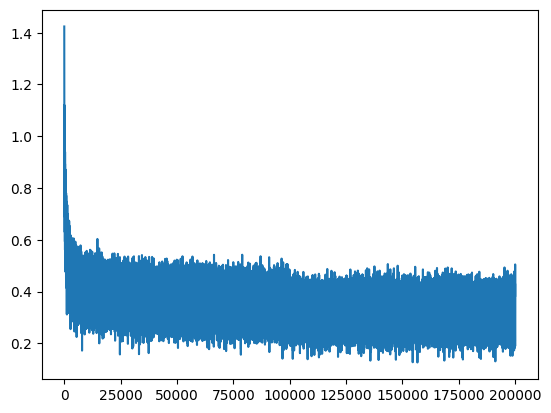

In [305]:
plt.plot(range(len(lossi)), lossi)

In [306]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # Why tanh here?
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1771, grad_fn=<NllLossBackward0>)

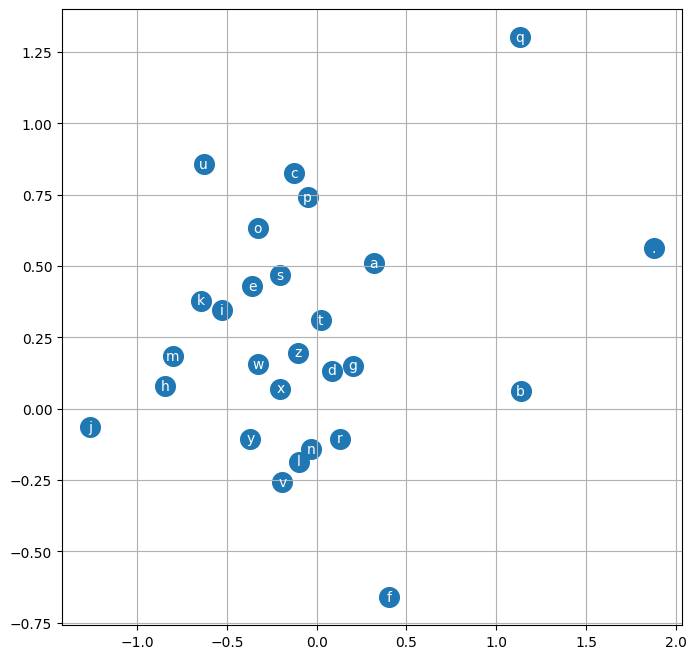

In [291]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

0.3939213752746582

In [307]:
g = torch.Generator().manual_seed(12345)
block_size = 3
for _ in range(20):
    out = []
    context = deque([0] * block_size)
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()

        context.popleft()
        context.append(ix)
        
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

surepian.
nat.
nail.
zerik.
jayley.
mad.
rodyanni.
ter.
carssorer.
chan.
sharlaya.
arahlylan.
gena.
sem.
hendrie.
aden.
jazya.
dalliellarn.
kashlyrion.
maliikott.
